Importing the required libraries

In [1]:
#### Importing packages #####
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import math

Importing the data. While importing the data, the data has '?' which is converted into NAs

In [3]:
data = pd.read_table('adult.data', sep=r'\s*,\s*' ,na_valuesa=[a"?"], header =None)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Assigning column names

In [4]:
data.columns=[ "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"]

In [5]:
data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


NULL Data Checking
Columns Workclass,Occupation and Country have null values. I have treated each of the column seperately below

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           31978 non-null object
Target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Looking at the data distribution, below are some data findings:
1.Most of the data has poeple working in private firms
2. Most of the people are HS-grad
3. Most of the data is for United States native 
4. Since most it is for US native, the majority of data is for white race

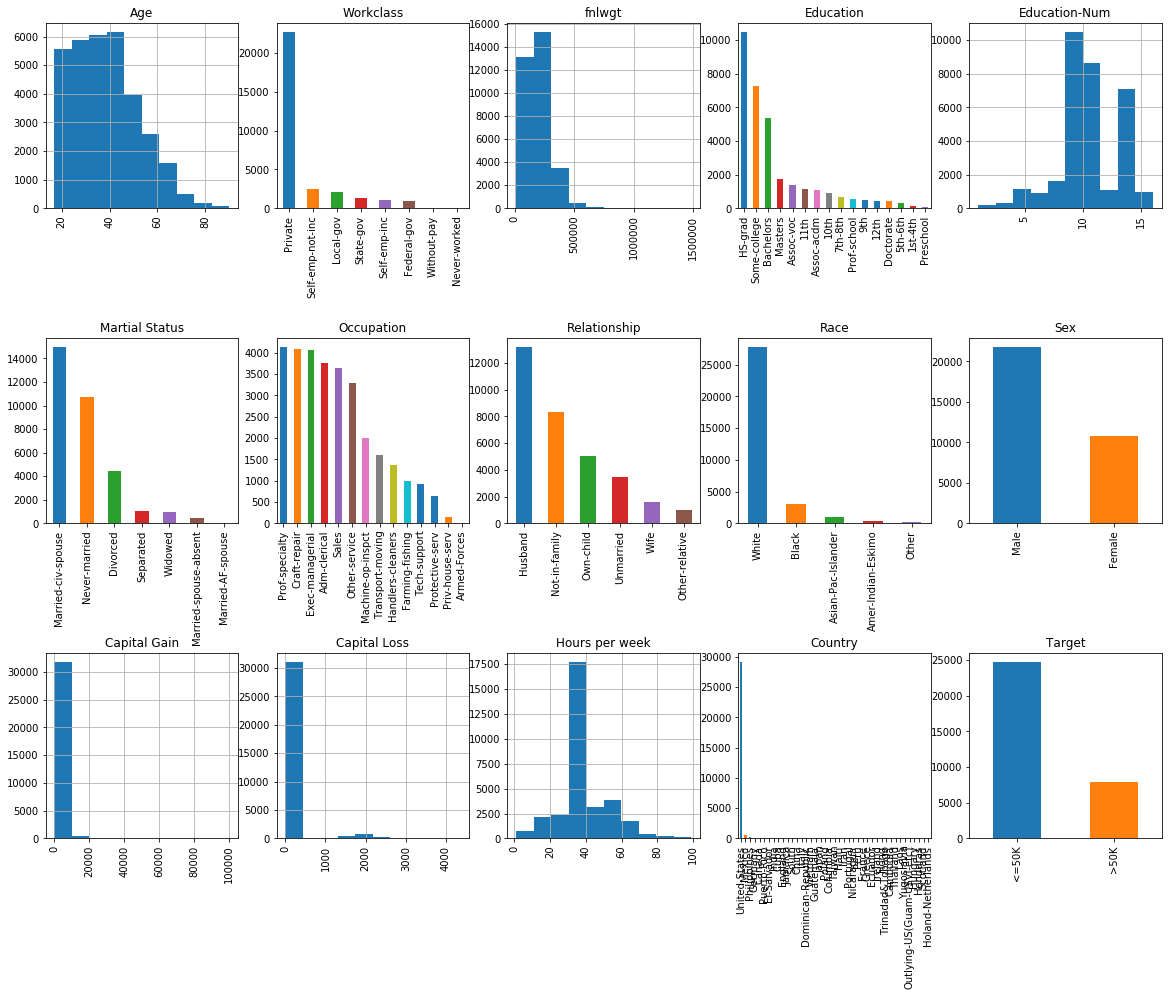

In [7]:
fig = plt.figure(figsize=(20,15))
cols = 5
rows = math.ceil(float(data.shape[1]) / cols)
for i, column in enumerate(data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

Correlation matrix for numerical columns

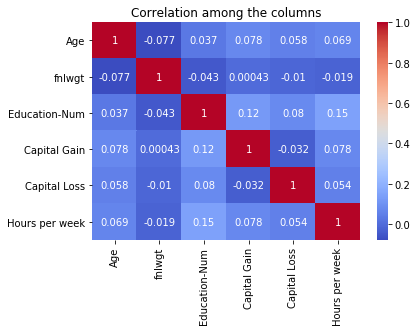

In [8]:
sns.heatmap(data.corr(),annot=True, cmap = 'coolwarm')
plt.title('Correlation among the columns')
plt.show()

NULL DATA TREATMENT FOR WORKCLASS COLUMN
Based on the columns, columns which might affect the distribution of Worclass are Race, Education,Age.
But, on seeing the distribution, it is evident that the maximum frequency of workclass being private is consistent across race, education and age. Hence, I have filled the null value of workclass data with the majority

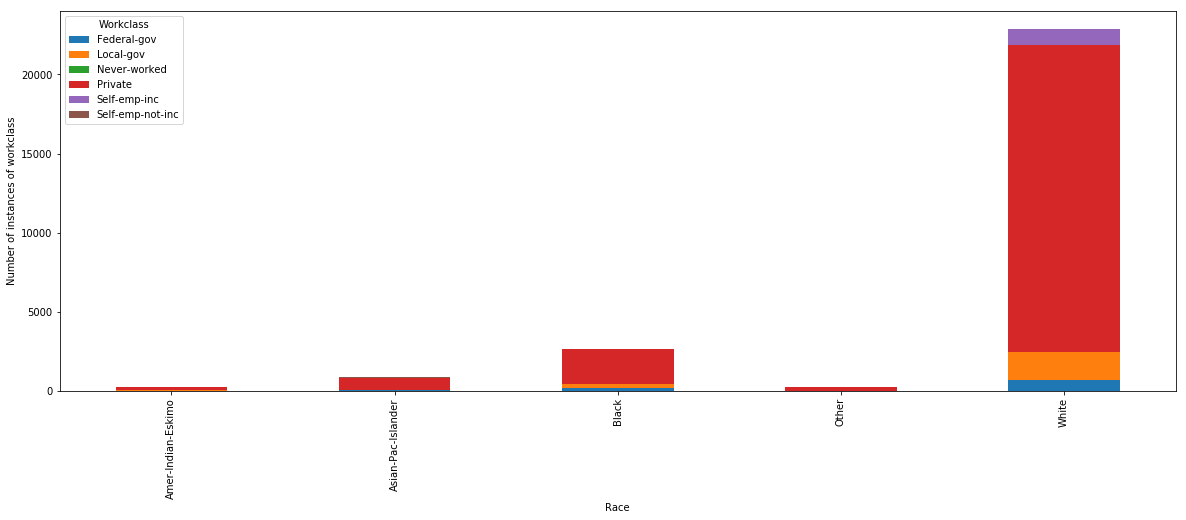

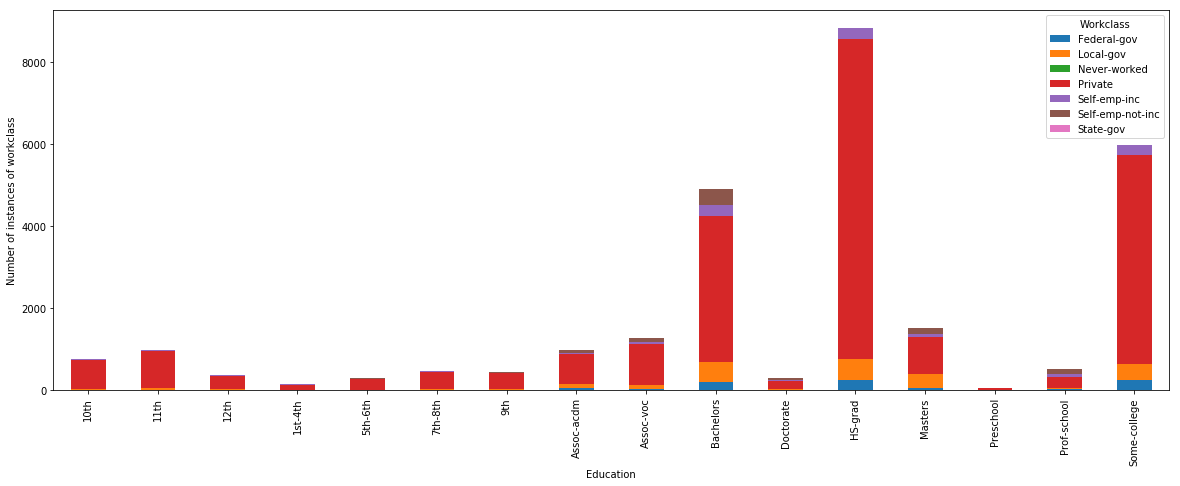

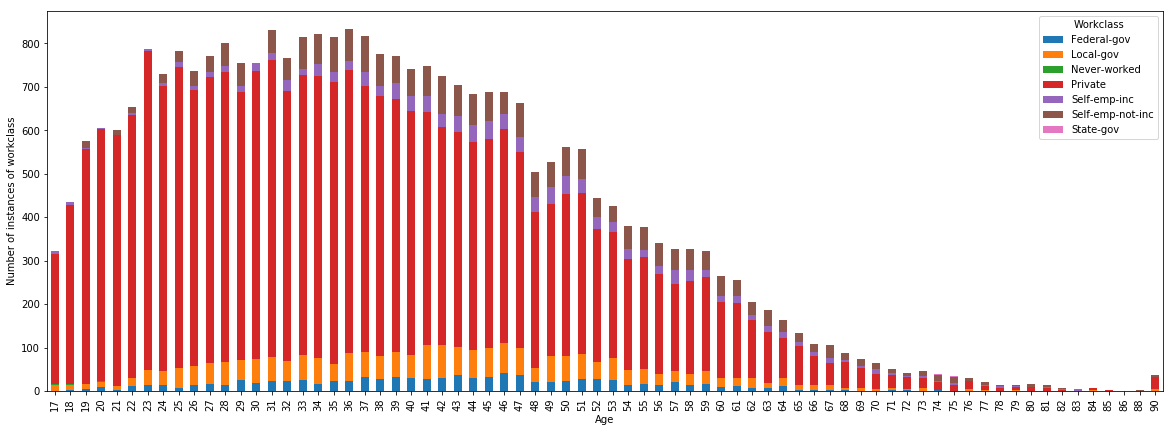

In [9]:
bo = pd.DataFrame(data.groupby(['Race','Workclass'], as_index =False)['Target'].count())
bo2=bo.groupby("Race", as_index=False).head(5)
pivot_df = bo2.pivot(index='Race', columns='Workclass', values='Target')
pivot_df.plot.bar(stacked =True ,figsize=(20,7))
plt.xlabel('Race')
plt.ylabel('Number of instances of workclass')
plt.show()
#plt.subplot(2,1,1)


bo = pd.DataFrame(data.groupby(['Education','Workclass'], as_index =False)['Target'].count())
bo2=bo.groupby("Education", as_index=False).head(5)
pivot_df = bo2.pivot(index='Education', columns='Workclass', values='Target')
pivot_df.plot.bar(stacked =True ,figsize=(20,7))
plt.xlabel('Education')
plt.ylabel('Number of instances of workclass')
plt.show()
#plt.subplot(2,1,2)

bo = pd.DataFrame(data.groupby(['Age','Workclass'], as_index =False)['Target'].count())
bo2=bo.groupby("Age", as_index=False).head(5)
pivot_df = bo2.pivot(index='Age', columns='Workclass', values='Target')
pivot_df.plot.bar(stacked =True ,figsize=(20,7))
plt.xlabel('Age')
plt.ylabel('Number of instances of workclass')
plt.show()



NULL DATA TREATMENT FOR OCCUPATION COLUMN
Looking at the distribution of occupation across age, education and race, it shows that occupation distribution is similar across race but varies across age and education. Hence for null data treatment of occupation, I have taken the mode of occupation at Age x Education level

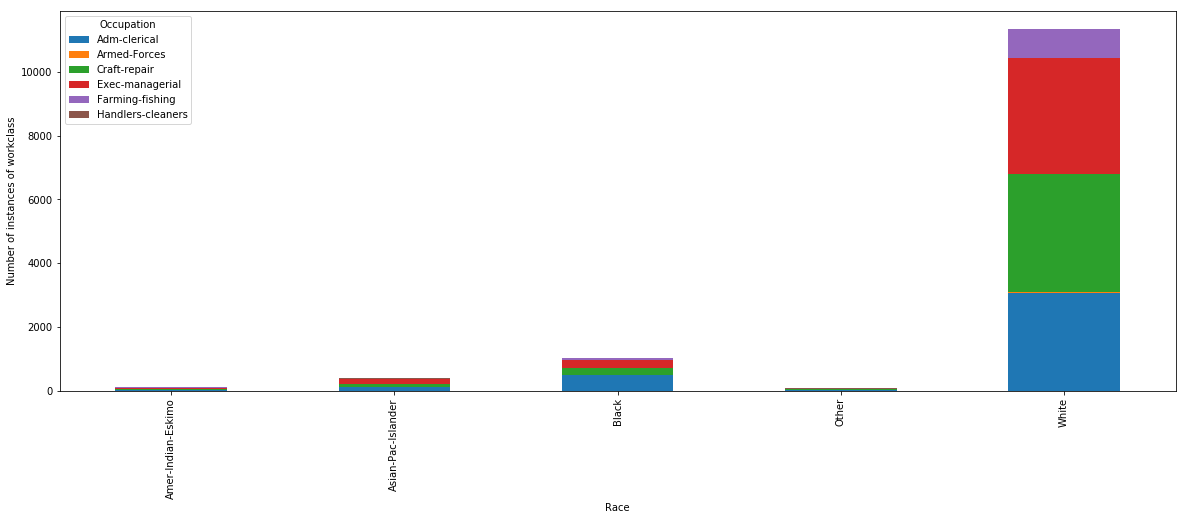

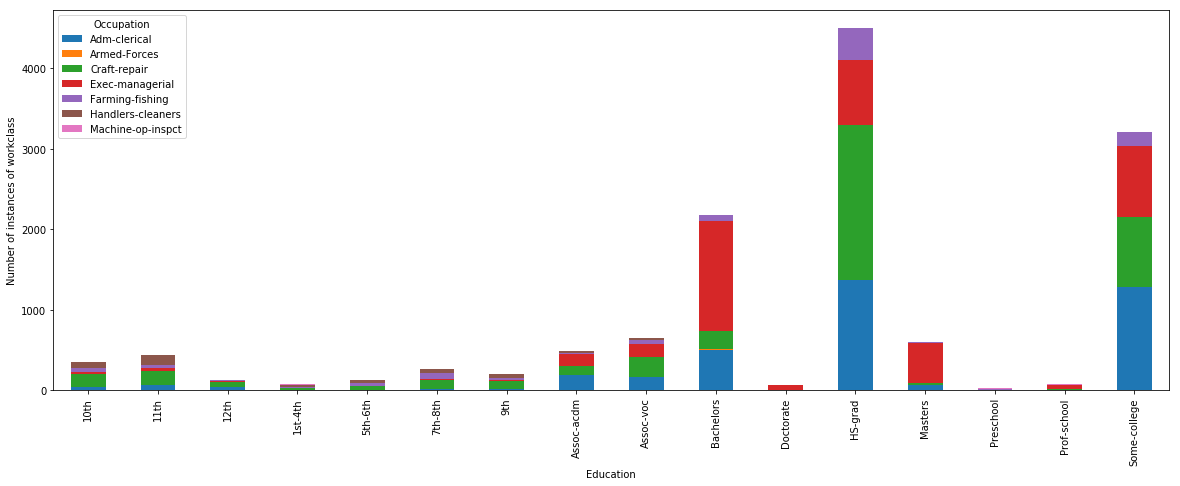

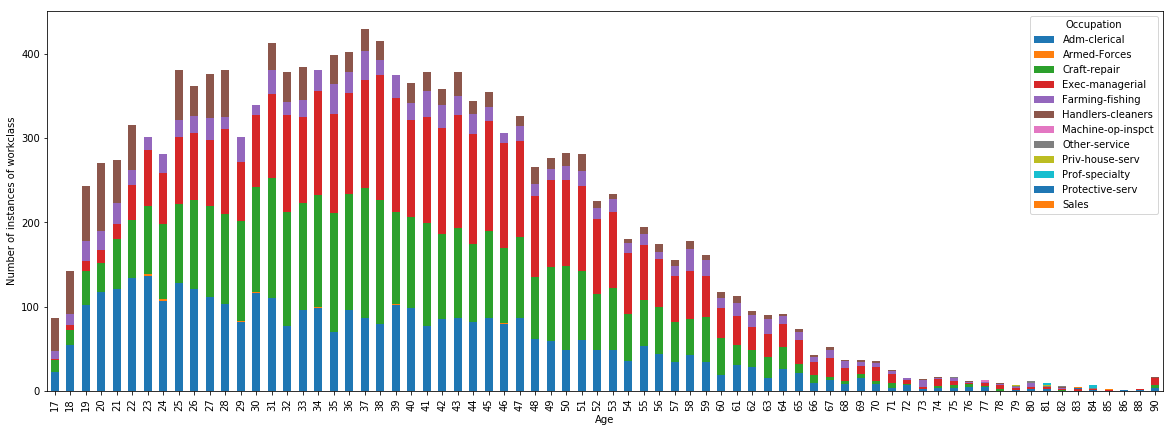

In [10]:
bo = pd.DataFrame(data.groupby(['Race','Occupation'], as_index =False)['Target'].count())
bo2=bo.groupby("Race", as_index=False).head(5)
pivot_df = bo2.pivot(index='Race', columns='Occupation', values='Target')
pivot_df.plot.bar(stacked =True ,figsize=(20,7))
plt.xlabel('Race')
plt.ylabel('Number of instances of workclass')
plt.show()
#plt.subplot(2,1,1)


bo = pd.DataFrame(data.groupby(['Education','Occupation'], as_index =False)['Target'].count())
bo2=bo.groupby("Education", as_index=False).head(5)
pivot_df = bo2.pivot(index='Education', columns='Occupation', values='Target')
pivot_df.plot.bar(stacked =True ,figsize=(20,7))
plt.xlabel('Education')
plt.ylabel('Number of instances of workclass')
plt.show()
#plt.subplot(2,1,2)

bo = pd.DataFrame(data.groupby(['Age','Occupation'], as_index =False)['Target'].count())
bo2=bo.groupby("Age", as_index=False).head(5)
pivot_df = bo2.pivot(index='Age', columns='Occupation', values='Target')
pivot_df.plot.bar(stacked =True ,figsize=(20,7))
plt.xlabel('Age')
plt.ylabel('Number of instances of workclass')
plt.show()



In [11]:

data.groupby(['Target'])['Target'].count()


Target
<=50K    24720
>50K      7841
Name: Target, dtype: int64

Null data treatment for workclass column as explained above

In [12]:
data['Workclass'].fillna(data['Workclass'].mode()[0], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           31978 non-null object
Target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Null data treatment for occupation column as explained above

In [13]:
m=pd.DataFrame(data.groupby(['Age','Education']).Occupation.apply(lambda x: x.mode()))
m=m.rename(columns = {'Occupation':'occ_na'})
m=m.rename(columns = {'':'num'})
m.reset_index( inplace=True)
m.columns =['Age','Education','nn','occ_na']
m1=m[m.nn==0]

In [14]:
new= pd.merge(data,m1,on=['Age','Education'],how='outer')
new.shape

(32561, 17)

In [15]:
new['Occupation']= new['Occupation'].fillna(new.occ_na)

In [16]:
new['Occupation'].fillna(new['Occupation'].mode()[0], inplace=True)

In [17]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 17 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           31978 non-null object
Target            32561 non-null object
nn                32525 non-null float64
occ_na            32525 non-null object
dtypes: float64(1), int64(6), object(10)
memory usage: 4.5+ MB


In [18]:
new =new.drop(['nn','occ_na'], axis=1)
data=new

NULL DATA TREATMENT FOR COUNTRY COLUMN. 
Since most of the data is of USA, I am filling the null value with USA. Also, since USA makes up majority of data, I have divided the data as US and Non US for dimensionality reduction

In [19]:
data['Country']=data['Country'].fillna('United-States')

In [20]:
data['Country']=data['Country'].replace('United-States',1)
data.loc[data['Country'] !=1, 'Country'] = 0

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           32561 non-null int64
Target            32561 non-null object
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


In [22]:
#!pip install --upgrade pip
#!pip install imblearn  


In [23]:
print('Proportion of <=50k',len(data[data.Target =='<=50K'])/ len(data))
print("Proportion of >50k",len(data[data.Target =='>50K'])/ len(data))

Proportion of <=50k 0.7591904425539756
Proportion of >50k 0.2408095574460244


In [ ]:
The data is imbalanced. Hence this might skew the data. There are many ways such oversampling, undersampling and SMOTE. I prefer SMOTE over the others, since it reduces effect of overfitting in train data. Hence, below is the code for doing SMOTE analysis. But this increases the data size further. Given the time constraint, I am unable to run the models on such a big data. Hence, I have written the code for processing data as SMOTE but have not run here.

from imblearn.over_sampling import SMOTE
X_data = data.iloc[:,0:14]
data_train_y = data.iloc[:,14]
data_train_y=data_train_y.replace('>50K',0)
data_train_y=data_train_y.replace('<=50K',1)
x = pd.get_dummies(data=X_data, columns=['Workclass','Martial Status','Occupation','Relationship','Race','Sex'],prefix = ['Workclass','Martial Status','Occupation','Relationship','Race','Sex'], drop_first=True) 
X_data =x
data_train_X=X_data.drop(['Education'], axis=1)
columns = data_train_X.columns
os = SMOTE(random_state=25)
os_data_X,os_data_y=os.fit_sample(data_train_X,data_train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["Target"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of rows with salary >50",len(os_data_y[os_data_y["Target"]==0]))
print("Number of rows with salary <=50",len(os_data_y[os_data_y["Target"]==1]))
print("Proportion of Normal data in oversampled data is ",len(os_data_y[os_data_y["Target"]==0])/len(os_data_X))
print("Proportion of undersampled data in oversampled data is ",len(os_data_y[os_data_y["Target"]==1])/len(os_data_X))
X_data =os_data_X
y_train=os_data_y

Splitting the train data into explanatory and dependent variable

In [24]:
X_data = data.iloc[:,0:14]
y_train = data.iloc[:,14]


Converting the categorical data into dummy variables

In [25]:
x = pd.get_dummies(data=X_data, columns=['Workclass','Martial Status','Occupation','Relationship','Race','Sex'],prefix = ['Workclass','Martial Status','Occupation','Relationship','Race','Sex'], drop_first=True) 
X_data =x
X_data=X_data.drop(['Education'], axis=1)

Cleaning the data for test data in the similar way

In [26]:
test = pd.read_table('adult.test', sep=r'\s*,\s*' ,na_values=["?"], header =None)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [27]:
test.columns=[ "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"]

In [28]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
Age               16281 non-null int64
Workclass         15318 non-null object
fnlwgt            16281 non-null int64
Education         16281 non-null object
Education-Num     16281 non-null int64
Martial Status    16281 non-null object
Occupation        15315 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Capital Gain      16281 non-null int64
Capital Loss      16281 non-null int64
Hours per week    16281 non-null int64
Country           16007 non-null object
Target            16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [29]:
test['Workclass'].fillna(test['Workclass'].mode()[0], inplace=True)

In [30]:
m=pd.DataFrame(test.groupby(['Age','Education']).Occupation.apply(lambda x: x.mode()))
m=m.rename(columns = {'Occupation':'occ_na'})
m=m.rename(columns = {'':'num'})
m.reset_index( inplace=True)
m.columns =['Age','Education','nn','occ_na']

m1=m[m.nn==0]

In [31]:
new= pd.merge(test,m1,on=['Age','Education'],how='outer')
new.shape

(16281, 17)

In [32]:
new['Occupation']= new['Occupation'].fillna(new.occ_na)

In [33]:
new['Occupation'].fillna(new['Occupation'].mode()[0], inplace=True)

In [34]:
new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 0 to 16280
Data columns (total 17 columns):
Age               16281 non-null int64
Workclass         16281 non-null object
fnlwgt            16281 non-null int64
Education         16281 non-null object
Education-Num     16281 non-null int64
Martial Status    16281 non-null object
Occupation        16281 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Capital Gain      16281 non-null int64
Capital Loss      16281 non-null int64
Hours per week    16281 non-null int64
Country           16007 non-null object
Target            16281 non-null object
nn                16254 non-null float64
occ_na            16254 non-null object
dtypes: float64(1), int64(6), object(10)
memory usage: 2.2+ MB


In [35]:
new =new.drop(['nn','occ_na'], axis=1)
test=new


In [36]:
test['Country']=test['Country'].fillna('No USA')
test['Country']=test['Country'].replace('United-States',1)
test.loc[test['Country'] !=1, 'Country'] = 0

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16281 entries, 0 to 16280
Data columns (total 15 columns):
Age               16281 non-null int64
Workclass         16281 non-null object
fnlwgt            16281 non-null int64
Education         16281 non-null object
Education-Num     16281 non-null int64
Martial Status    16281 non-null object
Occupation        16281 non-null object
Relationship      16281 non-null object
Race              16281 non-null object
Sex               16281 non-null object
Capital Gain      16281 non-null int64
Capital Loss      16281 non-null int64
Hours per week    16281 non-null int64
Country           16281 non-null int64
Target            16281 non-null object
dtypes: int64(7), object(8)
memory usage: 2.0+ MB


In [38]:
X_data_t = test.iloc[:,0:14]
y_test = test.iloc[:,14]

In [39]:
y_test.unique()

array(['<=50K.', '>50K.'], dtype=object)

In [40]:
y_test=y_test.replace('<=50K.','<=50K')
y_test=y_test.replace('>50K.','>50K')

In [41]:
y_test=y_test.replace('>50K',0)
y_test=y_test.replace('<=50K',1)
y_train=y_train.replace('>50K',0)   
y_train=y_train.replace('<=50K',1)    

In [42]:
x = pd.get_dummies(data=X_data_t, columns=['Workclass','Martial Status','Occupation','Relationship','Race','Sex'],prefix = ['Workclass','Martial Status','Occupation','Relationship','Race','Sex'], drop_first=True) 
X_data_t =x
X_data_t=X_data_t.drop(['Education'], axis=1)

Scaling the explanatory data for test and train.

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = scaler.fit_transform(X_data_t)

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_data)

In [89]:
#!pip install -U scikit-learn

Applying grid search on each model to find the best hyperparameter for various models.

K Neighbours Classifier

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [46]:
param_grid = {"n_neighbors" :[1,3,7,13,15]}
print(param_grid)

{'n_neighbors': [1, 3, 7, 13, 15]}


In [47]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 7, 13, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [48]:
print(grid.best_score_)
print(grid.best_params_)

0.8309941340867909
{'n_neighbors': 15}


In [49]:
knn_predict = grid.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix
print("\nKNN confusion matrix:")
print(confusion_matrix(y_test, knn_predict))


KNN confusion matrix:
[[ 2170  1676]
 [ 1043 11392]]


In [51]:
from sklearn.metrics import classification_report
print("\nKNN scores:")
print(classification_report(y_test, knn_predict))


KNN scores:
             precision    recall  f1-score   support

          0       0.68      0.56      0.61      3846
          1       0.87      0.92      0.89     12435

avg / total       0.83      0.83      0.83     16281



In [52]:
y_knn_predict = grid.predict(X_test)
y_knn_train_predict = grid.predict(X_train) 

In [53]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(y_knn_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(y_knn_predict, y_test))

Train roc_auc_score: 0.81
Test roc_auc_score: 0.77 


In [97]:
report_table= [['knn', 'k = 15', grid.score(X_train, y_train), grid.score(X_test, y_test), roc_auc_score(y_knn_train_predict, y_train), roc_auc_score(y_knn_predict, y_test) ]]

In [98]:
report_table

[['knn',
  'k = 15',
  0.8536592856484752,
  0.8329955162459308,
  0.8090094983878588,
  0.7735645222276238]]

Logistic Regression

In [56]:
from sklearn import linear_model

logistic = linear_model.LogisticRegression()
penalty = ['l1', 'l2']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
hyperparameters = dict(C=C, penalty=penalty)
grid_lg = GridSearchCV(logistic, hyperparameters, cv=5, scoring='accuracy')

In [57]:
grid_lg.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [58]:
print(grid_lg.best_score_)
print(grid_lg.best_params_)

0.8487454316513621
{'C': 10, 'penalty': 'l1'}


In [59]:
lg_predict = grid_lg.predict(X_test)
lg_train_predict = grid_lg.predict(X_train)

In [60]:
from sklearn.metrics import confusion_matrix
print("\nLG confusion matrix:")
print(confusion_matrix(y_test, lg_predict))


LG confusion matrix:
[[ 2304  1542]
 [  869 11566]]


In [61]:
from sklearn.metrics import classification_report
print("\nLG scores:")
print(classification_report(y_test, lg_predict))


LG scores:
             precision    recall  f1-score   support

          0       0.73      0.60      0.66      3846
          1       0.88      0.93      0.91     12435

avg / total       0.85      0.85      0.85     16281



In [62]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(lg_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(lg_predict, y_test))

Train roc_auc_score: 0.81
Test roc_auc_score: 0.80 


In [99]:
report_table =report_table + [['lg', 'C=10, Penalty=l1', grid_lg.score(X_train, y_train), grid_lg.score(X_test, y_test), roc_auc_score(lg_train_predict, y_train), roc_auc_score(lg_predict, y_test) ]]
report_table

[['knn',
  'k = 15',
  0.8536592856484752,
  0.8329955162459308,
  0.8090094983878588,
  0.7735645222276238],
 ['lg',
  'C=10, Penalty=l1',
  0.8514787629372562,
  0.8519132731404705,
  0.8069928894227925,
  0.8042443051836997]]

Linear SVC

In [64]:
from sklearn.svm import LinearSVC

svc_lin = LinearSVC()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 10, scoring='accuracy')
grid_svc_lin.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [65]:
print(grid_svc_lin.best_score_)
print(grid_svc_lin.best_params_)

0.850188876263014
{'C': 10}


In [67]:
lin_svc_predict = grid_svc_lin.predict(X_test)
lin_svc_train_predict = grid_svc_lin.predict(X_train)

In [68]:
from sklearn.metrics import confusion_matrix
print("\nLinSVC confusion matrix:")
print(confusion_matrix(y_test, lin_svc_predict))


LinSVC confusion matrix:
[[ 2264  1582]
 [  824 11611]]


In [69]:
from sklearn.metrics import classification_report
print("\nLinSVC scores:")
print(classification_report(y_test, lin_svc_predict))


LinSVC scores:
             precision    recall  f1-score   support

          0       0.73      0.59      0.65      3846
          1       0.88      0.93      0.91     12435

avg / total       0.85      0.85      0.85     16281



In [70]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(lin_svc_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(lin_svc_predict, y_test))

Train roc_auc_score: 0.81
Test roc_auc_score: 0.81 


In [100]:
report_table =report_table + [['lin_svc', 'C=10', grid_svc_lin.score(X_train, y_train), grid_svc_lin.score(X_test, y_test), roc_auc_score(lin_svc_train_predict, y_train), roc_auc_score(lin_svc_predict, y_test) ]]
report_table

[['knn',
  'k = 15',
  0.8536592856484752,
  0.8329955162459308,
  0.8090094983878588,
  0.7735645222276238],
 ['lg',
  'C=10, Penalty=l1',
  0.8514787629372562,
  0.8519132731404705,
  0.8069928894227925,
  0.8042443051836997],
 ['lin_svc',
  'C=10',
  0.8515094745247381,
  0.8522203795835637,
  0.8093027960271558,
  0.8066242735883253]]

Kernalized SVC

In [ ]:
from sklearn.svm import SVC
#Grid Search with Cross-Validation using cv=10
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]}
grid_svc = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10, scoring = 'accuracy', n_jobs=-1)
grid_svc.fit(X_train,y_train)

In [ ]:
print("Best parameters: {}".format(grid_svc.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svc.best_score_))

In [ ]:
svc_predict = grid_svc.predict(X_test)
svc_train_predict = grid_svc.predict(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix
print("\nSVC_predict confusion matrix:")
print(confusion_matrix(y_test, svc_predict))

In [ ]:
from sklearn.metrics import classification_report
print("\nSVC scores:")
print(classification_report(y_test, svc_predict))

In [ ]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(svc_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(svc_predict, y_test))

In [ ]:
report_table =report_table + [['svc', 'C=100, gamma = 1', grid_svc.score(X_train, y_train), grid_svc.score(X_test, y_test), roc_auc_score(svc_train_predict, y_train), roc_auc_score(svc_predict, y_test) ]]
report_table

Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'max_depth': [2, 4, 6, 8, 10, 12]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10, scoring = 'accuracy')
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 4, 6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [73]:
print("Best parameters: {}".format(grid_dt.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_dt.best_score_))

Best parameters: {'max_depth': 6}
Best cross-validation score: 0.8518


In [74]:
dt_predict = grid_dt.predict(X_test)
dt_train_predict = grid_dt.predict(X_train)

In [75]:
from sklearn.metrics import confusion_matrix
print("\nDT_predict confusion matrix:")
print(confusion_matrix(y_test, dt_predict))


DT_predict confusion matrix:
[[ 1907  1939]
 [  562 11873]]


In [76]:
from sklearn.metrics import classification_report
print("\nDT scores:")
print(classification_report(y_test, dt_predict))


DT scores:
             precision    recall  f1-score   support

          0       0.77      0.50      0.60      3846
          1       0.86      0.95      0.90     12435

avg / total       0.84      0.85      0.83     16281



In [77]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(dt_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(dt_predict, y_test))

Train roc_auc_score: 0.84
Test roc_auc_score: 0.82 


In [101]:
report_table =report_table + [['DT', 'Max Depth = 6', grid_dt.score(X_train, y_train), grid_dt.score(X_test, y_test), roc_auc_score(dt_train_predict, y_train), roc_auc_score(dt_predict, y_test) ]]
report_table

[['knn',
  'k = 15',
  0.8536592856484752,
  0.8329955162459308,
  0.8090094983878588,
  0.7735645222276238],
 ['lg',
  'C=10, Penalty=l1',
  0.8514787629372562,
  0.8519132731404705,
  0.8069928894227925,
  0.8042443051836997],
 ['lin_svc',
  'C=10',
  0.8515094745247381,
  0.8522203795835637,
  0.8093027960271558,
  0.8066242735883253],
 ['DT',
  'Max Depth = 6',
  0.8569761370965265,
  0.8463853571647934,
  0.8373134545816666,
  0.8159961542237559]]

In [102]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])

In [103]:
report.index = report['Model name']

In [104]:
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
Model name,,,,,,
knn,knn,k = 15,0.853659,0.832996,0.809009,0.773565
lg,lg,"C=10, Penalty=l1",0.851479,0.851913,0.806993,0.804244
lin_svc,lin_svc,C=10,0.851509,0.852220,0.809303,0.806624
DT,DT,Max Depth = 6,0.856976,0.846385,0.837313,0.815996


Random Forest

In [82]:
param_grid = {'n_estimators': [100,200,300,400,500], 'max_depth': [2, 4, 6, 8, 10, 12] }

In [83]:
from sklearn.ensemble import RandomForestClassifier
grid_rf = GridSearchCV(RandomForestClassifier(random_state=25), param_grid, cv=10, scoring = 'accuracy', n_jobs=-1)

grid_rf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=25, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [2, 4, 6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [84]:
print("Best parameters: {}".format(grid_rf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_rf.best_score_))

Best parameters: {'max_depth': 12, 'n_estimators': 200}
Best cross-validation score: 0.8583


In [85]:
rf_predict = grid_rf.predict(X_test)
rf_train_predict = grid_rf.predict(X_train)

In [86]:
from sklearn.metrics import confusion_matrix
print("\nRF_predict confusion matrix:")
print(confusion_matrix(y_test, rf_predict))


RF_predict confusion matrix:
[[ 2117  1729]
 [  571 11864]]


In [87]:
from sklearn.metrics import classification_report
print("\nRF scores:")
print(classification_report(y_test, rf_predict))


RF scores:
             precision    recall  f1-score   support

          0       0.79      0.55      0.65      3846
          1       0.87      0.95      0.91     12435

avg / total       0.85      0.86      0.85     16281



In [88]:
from sklearn.metrics import roc_auc_score
print('Train roc_auc_score: %.2f'%roc_auc_score(rf_train_predict, y_train))
print('Test roc_auc_score: %.2f '%roc_auc_score(rf_predict, y_test))

Train roc_auc_score: 0.86
Test roc_auc_score: 0.83 


In [105]:
report_table =report_table + [['RF', 'nestimators : 200,max_depth : 12', grid_rf.score(X_train, y_train), grid_rf.score(X_test, y_test), roc_auc_score(rf_train_predict, y_train), roc_auc_score(rf_predict, y_test) ]]
report_table

[['knn',
  'k = 15',
  0.8536592856484752,
  0.8329955162459308,
  0.8090094983878588,
  0.7735645222276238],
 ['lg',
  'C=10, Penalty=l1',
  0.8514787629372562,
  0.8519132731404705,
  0.8069928894227925,
  0.8042443051836997],
 ['lin_svc',
  'C=10',
  0.8515094745247381,
  0.8522203795835637,
  0.8093027960271558,
  0.8066242735883253],
 ['DT',
  'Max Depth = 6',
  0.8569761370965265,
  0.8463853571647934,
  0.8373134545816666,
  0.8159961542237559],
 ['RF',
  'nestimators : 200,max_depth : 12',
  0.8756487822855563,
  0.858731036177139,
  0.8608222084706258,
  0.830188291176656]]

Looking at all the metrics mentioned below in the table, Random forest(Ensemble) is the best model for this data following by decision tress and Logistic Regression

In [106]:
report = pd.DataFrame(report_table,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train auc score', 'Test auc score'])
report.index = report['Model name']
report

,Model name,Model parameter,Train accuracy,Test accuracy,Train auc score,Test auc score
Model name,,,,,,
knn,knn,k = 15,0.853659,0.832996,0.809009,0.773565
lg,lg,"C=10, Penalty=l1",0.851479,0.851913,0.806993,0.804244
lin_svc,lin_svc,C=10,0.851509,0.852220,0.809303,0.806624
DT,DT,Max Depth = 6,0.856976,0.846385,0.837313,0.815996
RF,RF,"nestimators : 200,max_depth : 12",0.875649,0.858731,0.860822,0.830188


In [108]:
forest = RandomForestClassifier(n_estimators=200,max_depth=12, random_state=25)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.876
Accuracy on test set: 0.859


In [109]:
forest.feature_importances_

array([8.13068121e-02, 2.24667071e-02, 1.52550558e-01, 1.81108429e-01,
       4.44013094e-02, 5.30143131e-02, 2.94438697e-03, 2.07868821e-03,
       7.89509802e-07, 4.39510659e-03, 5.06652727e-03, 5.64064107e-03,
       1.60561669e-03, 2.68798634e-05, 6.50796759e-04, 1.90627077e-01,
       7.91838951e-04, 5.18965057e-02, 1.91638412e-03, 1.52298954e-03,
       1.30719840e-06, 3.36404321e-03, 2.86351000e-02, 4.77303838e-03,
       2.66612963e-03, 2.40047758e-03, 1.06092274e-02, 7.35041716e-05,
       2.34137550e-02, 1.19982358e-03, 2.62164924e-03, 2.42899924e-03,
       2.00010472e-03, 2.97701788e-02, 1.83871365e-03, 2.19808242e-02,
       1.33228203e-02, 1.18495330e-02, 1.68941374e-03, 2.41566887e-03,
       5.05657550e-04, 2.63997566e-03, 2.57876977e-02])

Looking at the feature importance Black Race, Capital Gain and Capital Loss are the important features

<IPython.core.display.Javascript object>


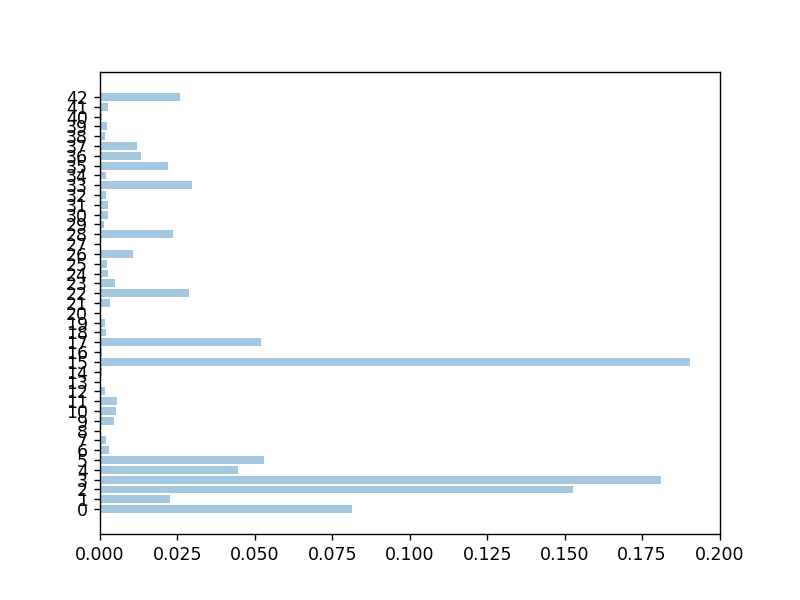

([<matplotlib.axis.YTick at 0x23acead6be0>,
 <a list of 43 Text yticklabel objects>)

In [110]:
%matplotlib notebook

y_list = forest.feature_importances_
y_pos = np.arange(len(y_list))
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos)

Running ensemble techniques, using soft voting classifier between Logistic Regression and Decision Trees. Here the accuravy further increases 

In [111]:
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression(penalty='l2',C=10)
log_clf.fit(X_train, y_train)
dt_clf = DecisionTreeClassifier(max_depth =10,random_state=25)
dt_clf.fit(X_train, y_train)


voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dt', dt_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, dt_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.8517290092746146
DecisionTreeClassifier 0.85283459246975
VotingClassifier 0.8539401756648854


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


For bagging classifier, I have used decision trees with the hyperparameters which we got as best in decision trees. But here, the accuracy has reduced

In [112]:
from sklearn.ensemble import BaggingClassifier


dt_clf = DecisionTreeClassifier(random_state=25)
bag_clf = BaggingClassifier(dt_clf, n_estimators=400, max_samples=100, bootstrap=True, n_jobs=-1, random_state=25)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [113]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8528960137583687


In [114]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.85
Test score: 0.85


In [115]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_tree))

0.7947300534365211


Applying gradeint boosting, with grid search, the the accuracy has become better

In [116]:
from  sklearn.ensemble import GradientBoostingClassifier
param_grid = {'n_estimators': [2,4,8],'max_depth': [2, 4, 6], 'learning_rate' :[0.1,1,10] }

grid_gbcl = GridSearchCV(GradientBoostingClassifier( random_state=25), param_grid, cv=10, scoring = 'accuracy')

grid_gbcl.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=25, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [2, 4, 8], 'max_depth': [2, 4, 6], 'learning_rate': [0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [117]:
print('Train score: {:.2f}'.format(grid_gbcl.score(X_train, y_train)))
print('Test score: {:.2f}'.format(grid_gbcl.score(X_test, y_test)))

Train score: 0.87
Test score: 0.85
